# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | maksatikha
Processing Record 6 of Set 1 | acarau
Processing Record 7 of Set 1 | vadso
Processing Record 8 of Set 1 | hafar al-batin
Processing Record 9 of Set 1 | aktau
Processing Record 10 of Set 1 | fale old settlement
Processing Record 11 of Set 1 | bamboo flat
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | san sebastian de la gomera
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | magdagachi
Processing Record 16 of Set 1 | mineros
Processing Record 17 of Set 1 | bani yas city
City not found. Skipping...
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | sriva

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,12.45,75,75,6.69,CA,1692378851
1,new norfolk,-42.7826,147.0587,7.72,92,100,1.83,AU,1692379092
2,port-aux-francais,-49.3500,70.2167,1.13,69,94,18.22,TF,1692379092
3,alice springs,-23.7000,133.8833,12.90,53,0,25.48,AU,1692378851
4,maksatikha,57.7970,35.8825,18.80,75,94,1.86,RU,1692379093


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,12.45,75,75,6.69,CA,1692378851
1,new norfolk,-42.7826,147.0587,7.72,92,100,1.83,AU,1692379092
2,port-aux-francais,-49.3500,70.2167,1.13,69,94,18.22,TF,1692379092
3,alice springs,-23.7000,133.8833,12.90,53,0,25.48,AU,1692378851
4,maksatikha,57.7970,35.8825,18.80,75,94,1.86,RU,1692379093


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

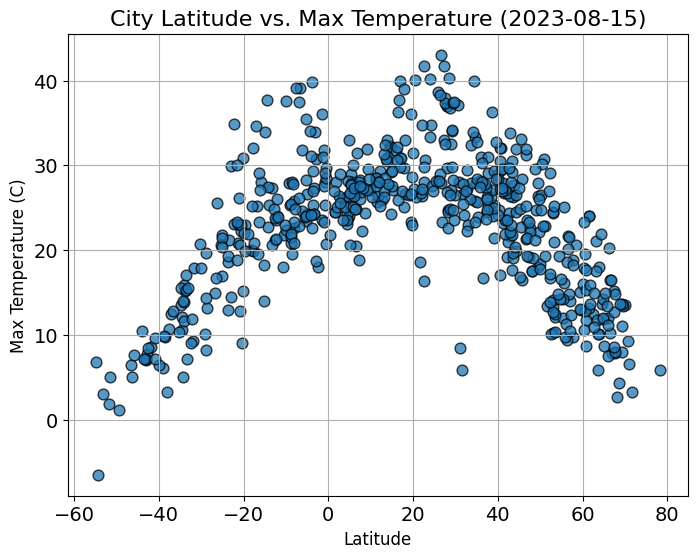

In [12]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.figure(figsize=(8,6))
plt.scatter(x,y,edgecolor="black",alpha=0.75,s=60)

# Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=12)
plt.ylabel("Max Temperature (C)",size=12)
plt.title("City Latitude vs. Max Temperature (2023-08-15)",size=16)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

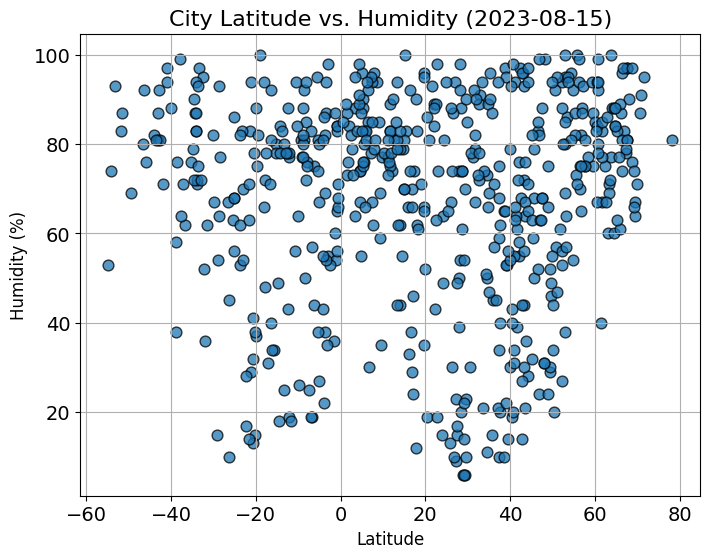

In [13]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.figure(figsize=(8,6))
plt.scatter(x,y,edgecolor="black",alpha=0.75,s=60)

# Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=12)
plt.ylabel("Humidity (%)",size=12)
plt.title("City Latitude vs. Humidity (2023-08-15)",size=16)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

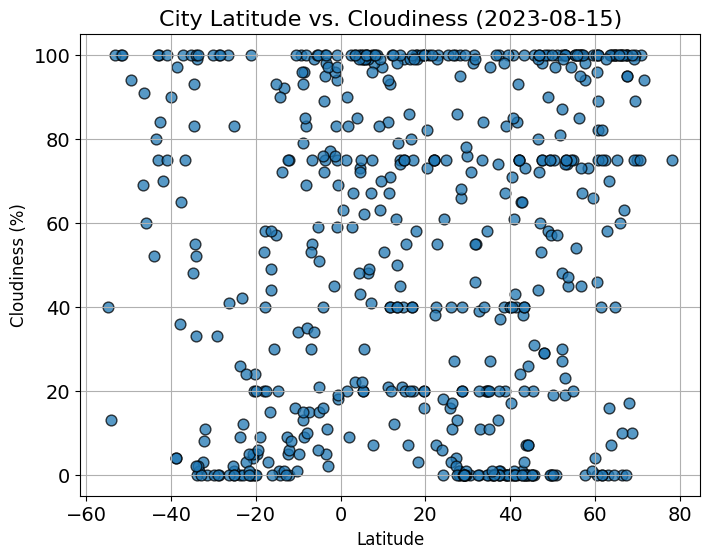

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.figure(figsize=(8,6))
plt.scatter(x,y,edgecolor="black",alpha=0.75,s=60)

# Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=12)
plt.ylabel("Cloudiness (%)",size=12)
plt.title("City Latitude vs. Cloudiness (2023-08-15)",size=16)
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

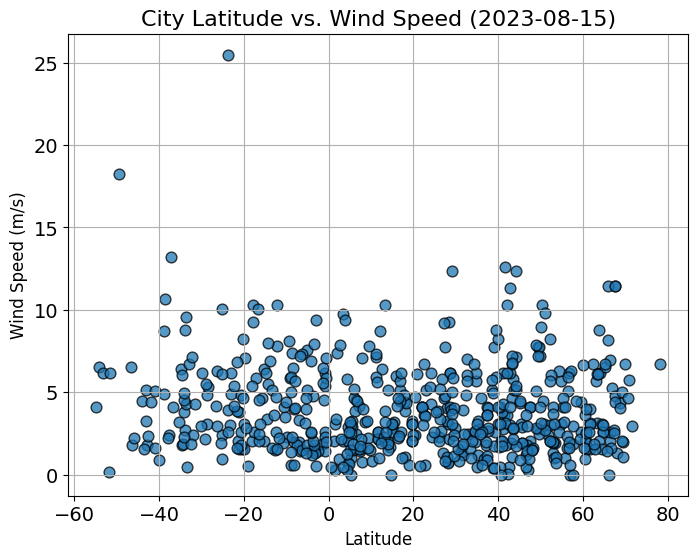

In [15]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.figure(figsize=(8,6))
plt.scatter(x,y,edgecolor="black",alpha=0.75,s=60)

# Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=12)
plt.ylabel("Wind Speed (m/s)",size=12)
plt.title("City Latitude vs. Wind Speed (2023-08-15)",size=16)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def linear_regress(x,y,xlabel,ylabel,label_xPos,label_yPos,hemisphere):

  #Initial scatter plot
  plt.figure(figsize=(8,6))
  plt.scatter(x,y,s=60)

  #Graph labels
  plt.tick_params(axis='both', which='major', labelsize=14)
  plt.xlabel(xlabel,size=12)
  plt.ylabel(ylabel,size=12)
  plt.title(f"{hemisphere} Hemisphere {xlabel} vs. {ylabel} Regression (2023-08-15)",size=16)

  #Regression Formula
  (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
  line_formula = slope*x + intercept
  plt.plot(x,line_formula,"r-")
  plt.annotate(f"y={round(slope,2)}x + {round(intercept,2)}", (label_xPos, label_yPos), color = "red", size = 14)
  print(f"The r-squared value is: {rvalue**2}")
  #print graph for viewing
  plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,12.45,75,75,6.69,CA,1692378851
4,maksatikha,57.7970,35.8825,18.80,75,94,1.86,RU,1692379093
6,vadso,70.0744,29.7487,13.49,71,75,6.69,NO,1692379093
7,hafar al-batin,28.4328,45.9708,40.32,20,66,9.26,SA,1692379093
8,aktau,43.6500,51.2000,26.32,64,0,5.83,KZ,1692379093


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,new norfolk,-42.7826,147.0587,7.72,92,100,1.83,AU,1692379092
2,port-aux-francais,-49.3500,70.2167,1.13,69,94,18.22,TF,1692379092
3,alice springs,-23.7000,133.8833,12.90,53,0,25.48,AU,1692378851
5,acarau,-2.8856,-40.1200,30.77,55,2,9.39,BR,1692379093
9,fale old settlement,-9.3852,-171.2468,27.89,81,100,8.12,TK,1692379093


#def linear_regress(x,y,xlabel,ylabel,label_xPos,label_yPos)
* `x` and `y` are arrays for columns from dataframe
* `xlabel` and `ylabel` are string values for name of axes
* `label_xPos` and `label_yPos` are int values for line label

###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.41623169670691007


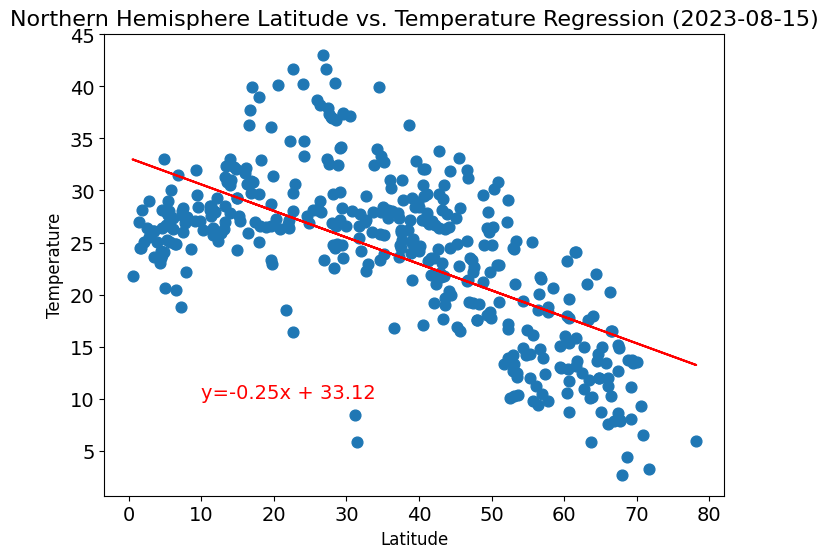

In [44]:
# Linear regression on Northern Hemisphere
#def linear_regress(x,y,xlabel,ylabel,label_xPos,label_yPos)
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Temperature", 10, 10,"Northern")

The r-squared value is: 0.6738884920760196


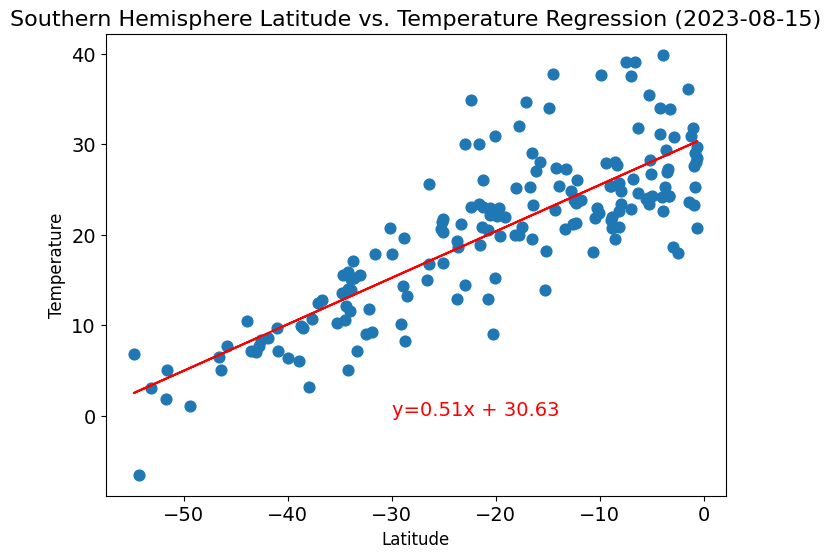

In [45]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Temperature", -30, 0,"Southern")

**Discussion about the linear relationship:** The coefficient of determination (r-squared value) for the Northern and Southern Hemisphere plots are 0.416 and 0.674.  We can tell just from this value alone that the Southern Hemisphere plot has a higher correlation between Latitude and Humidity.  By looking at the graphs, we can also confirm that the Southern Hemisphere has a tighter spread to the trend line than the Northern Hemisphere.

The latitude of the Southern Hemisphere has a better linear relationship with max temeprature than the Northern Hemisphere.  We can assume that as the latitude of the Southern Hemisphere decreases, the maximum temperature will generally decrease as well.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.0016867168976357943


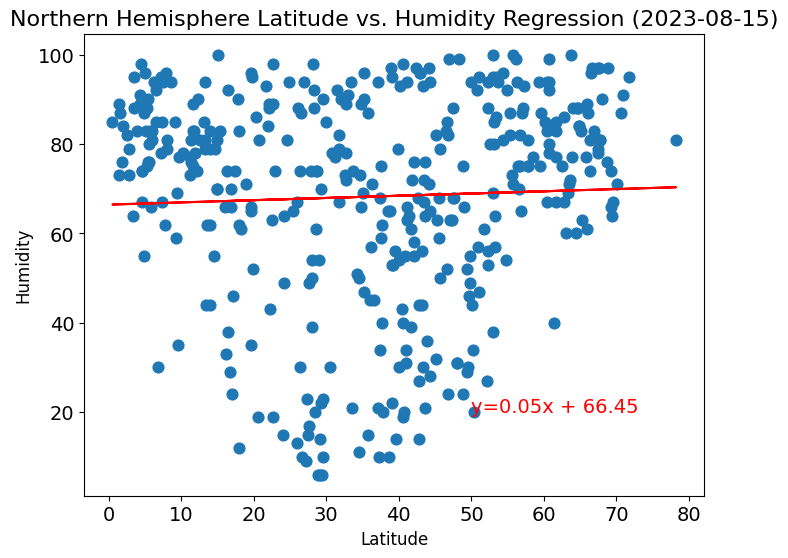

In [36]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", 50, 20,"Northern")

The r-squared value is: 0.036858655720480506


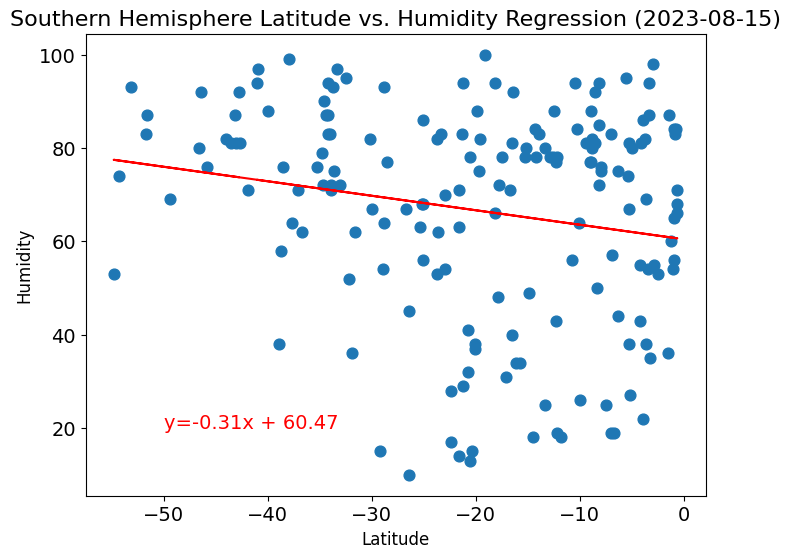

In [39]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", -50, 20,"Southern")

**Discussion about the linear relationship:** Both r-squared values are extremely low.  This means that there is little to no correlation between Hemisphere latitude and humidity levels.  Neither of the plots closely follow the trend line and most data points are spread out.  

According to this dataset, the relationship between hemisphere latitude and humidity levels are very weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 3.125026798777865e-05


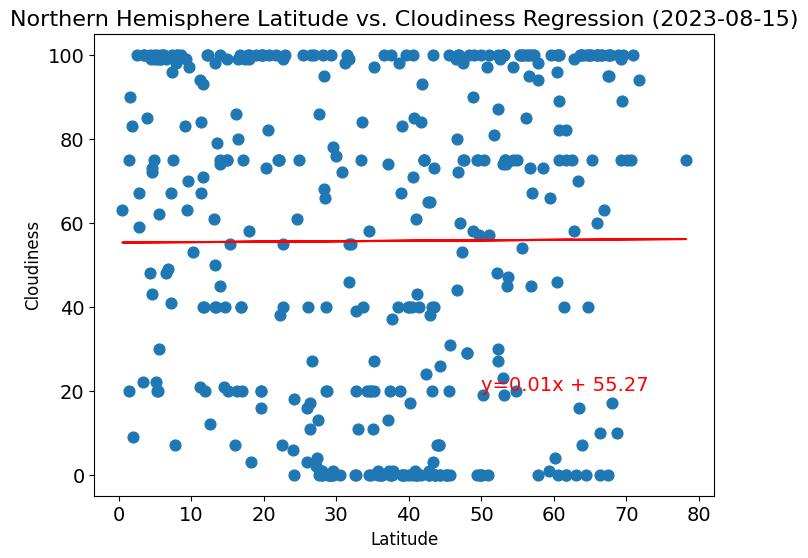

In [46]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 50, 20,"Northern")

The r-squared value is: 0.0013495993781676016


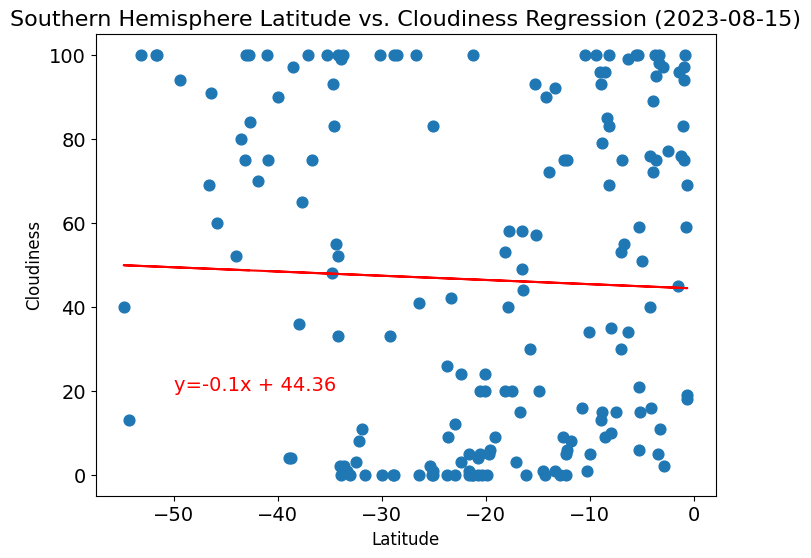

In [47]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", -50, 20,"Southern")

**Discussion about the linear relationship:** The Latitude vs. Cloudiness regressions provided a similar result to the Humidity regressions.

Both plots have little to no correlation between Latitude and Cloudiness.  Both plots have extremely small r-squared values and the data distribution looks random and not close to the trend line.

With this dataset, the relationship between Latitude and Cloudiness is weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.009606992822015957


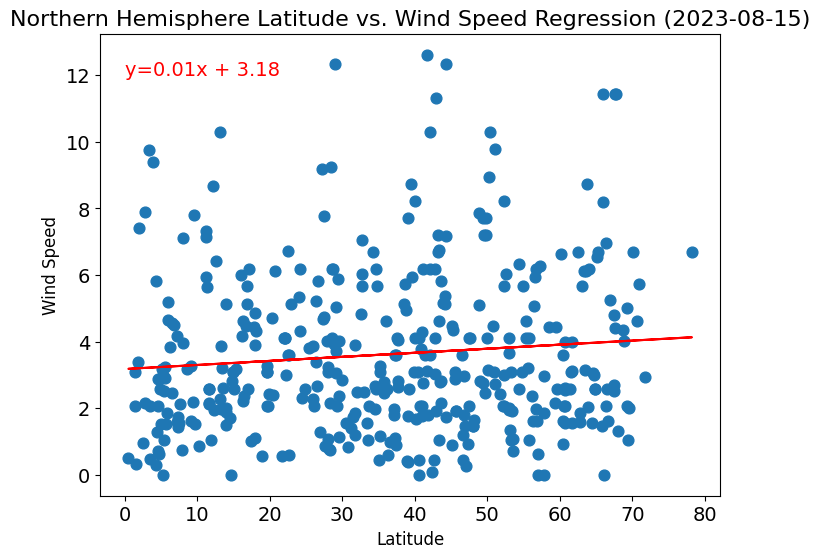

In [50]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", 0, 12,"Northern")

The r-squared value is: 0.014331561649032222


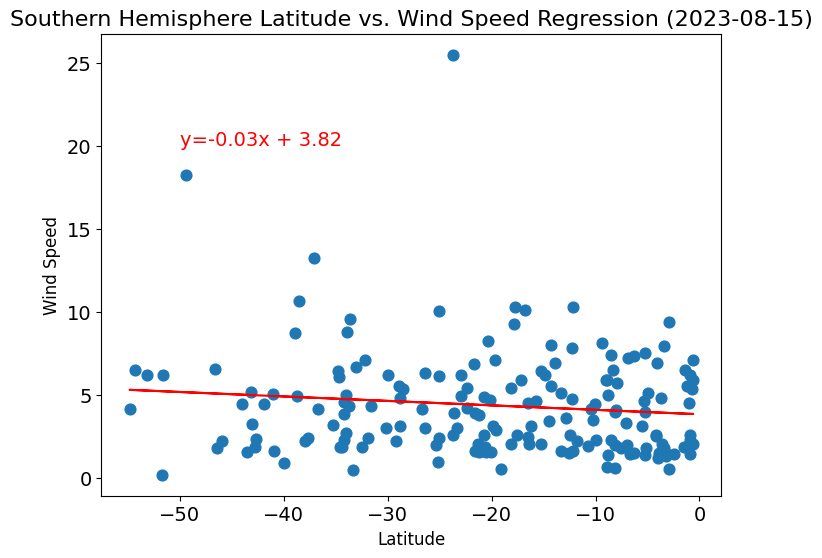

In [51]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", -50, 20,"Southern")

**Discussion about the linear relationship:** The plots for Latitude vs. Wind Speed provide very similar results to the previous 4 plots (Latitude vs. Humidity and Latitude vs. Cloudiness).

Both plots have extremely small r-squared values which means there is little to no correlation between Latitude and Wind Speed.  We can also confirm this by observing how spread out the data points are in both graphs.

Although the Southern Hemisphere plot may look like it has tight grouping to the trend line, the distribution does not change and there is no obvious correlation between the two variables.

With this dataset, the relationship between Latitude and Wind Speed is weak.